# Fichero `adult.csv` — Preparación de datos y modelo supervisado

Este notebook reúne **todo lo trabajado** hasta ahora:
1. Carga del dataset `adult.csv`
2. Creación del **dataset reducido** (solo columnas objetivo)
3. Limpieza de valores ausentes (`?` → `NaN`) y eliminación de filas incompletas
4. Definición de **X** e **y** (objetivo: `income`)
5. Identificación de variables **numéricas** y **categóricas**
6. Preprocesado con **ColumnTransformer** (StandardScaler + OneHotEncoder)
7. División **train/test**
8. Entrenamiento de un **modelo** (Regresión Logística)
9. Evaluación básica (classification report + matriz de confusión)



## 1. Carga del dataset

Nos aseguramos de que `adult.csv` está en la misma carpeta que este notebook.

In [96]:
# Importando las librerias
import os as os
import numpy as np
import pandas as pd

os.listdir()

['adult.csv', 'EstudioDatos_03_alum.ipynb']

## 2. Creación del dataset reducido (solo columnas objetivo)
**Variables que se conservarán (las únicas permitidas en la práctica):**



In [97]:
df_adulto = pd.read_csv("adult.csv")

columnas_objetivo = ['age', 'workclass', 'education', 'occupation', 'hours.per.week', 'income', 'race', 'sex','capital.gain', 'native.country', 'capital.loss']

df_adulto = df_adulto[columnas_objetivo]
df_adulto

,age,workclass,education,occupation,hours.per.week,income,race,sex,capital.gain,native.country,capital.loss
0,90,?,HS-grad,?,40,<=50K,White,Female,0,United-States,4356
1,82,Private,HS-grad,Exec-managerial,18,<=50K,White,Female,0,United-States,4356
2,66,?,Some-college,?,40,<=50K,Black,Female,0,United-States,4356
3,54,Private,7th-8th,Machine-op-inspct,40,<=50K,White,Female,0,United-States,3900
4,41,Private,Some-college,Prof-specialty,40,<=50K,White,Female,0,United-States,3900
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Protective-serv,40,<=50K,White,Male,0,United-States,0
32557,27,Private,Assoc-acdm,Tech-support,38,<=50K,White,Female,0,United-States,0
32558,40,Private,HS-grad,Machine-op-inspct,40,>50K,White,Male,0,United-States,0
32559,58,Private,HS-grad,Adm-clerical,40,<=50K,White,Female,0,United-States,0


## 3. Limpieza del dataset reducido

En adult.csv, los valores ausentes a veces aparecen como `?` en algunas columnas, como podemos ver en la celda anterior
- Sustituimos `?` por `NaN`
- Comprobamos nulos por columna


In [98]:
df_adulto.replace("?", np.nan, inplace=True)

df_adulto = df_adulto.dropna()

#df_adulto.isna().sum()

## 5. Identificación de variables numéricas y categóricas

De lo anterior vemos que hay:
- variables numéricas: 
- variables categóricas:

In [99]:
## Las variables numéricas son: edad, capital.gain y hours.per.week

## Las variables categóricas son: workclass, education, race, sex, native.country e income

### Preprocesado de los datos

En esta fase se preparan las variables para su uso en el modelo de Machine Learning.
Dado que el conjunto de datos contiene variables numéricas y categóricas, se aplican
técnicas de preprocesado diferenciadas, incluyendo la imputación de valores nulos,
el escalado de variables numéricas y la codificación de variables categóricas mediante
One-Hot Encoding.


In [100]:
# Al haber dos casos posibles de income, vamos a sustituirlo por cero o uno.
df_adulto.replace("<=50K", 0, inplace=True)
df_adulto.replace(">50K", 1, inplace=True)

df_adulto

/tmp/ipykernel_6095/3973584303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adulto.replace("<=50K", 0, inplace=True)
/tmp/ipykernel_6095/3973584303.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_adulto.replace(">50K", 1, inplace=True)
/tmp/ipykernel_6095/3973584303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adulto.replace(">50K", 1, inplace=True)


,age,workclass,education,occupation,hours.per.week,income,race,sex,capital.gain,native.country,capital.loss
1,82,Private,HS-grad,Exec-managerial,18,0,White,Female,0,United-States,4356
3,54,Private,7th-8th,Machine-op-inspct,40,0,White,Female,0,United-States,3900
4,41,Private,Some-college,Prof-specialty,40,0,White,Female,0,United-States,3900
5,34,Private,HS-grad,Other-service,45,0,White,Female,0,United-States,3770
6,38,Private,10th,Adm-clerical,40,0,White,Male,0,United-States,3770
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Protective-serv,40,0,White,Male,0,United-States,0
32557,27,Private,Assoc-acdm,Tech-support,38,0,White,Female,0,United-States,0
32558,40,Private,HS-grad,Machine-op-inspct,40,1,White,Male,0,United-States,0
32559,58,Private,HS-grad,Adm-clerical,40,0,White,Female,0,United-States,0


In [101]:
# Para resolver, deberemos de comprobar como podemos predecir el salario (income), para ello podemos comprobar en que basarnos para asi poder predecir el valor.
df_adulto.corr(numeric_only=True)

,age,hours.per.week,income,capital.gain,capital.loss
age,1.000000,0.101599,0.241998,0.080154,0.060165
hours.per.week,0.101599,1.000000,0.229480,0.080432,0.052417
income,0.241998,0.229480,1.000000,0.221196,0.150053
capital.gain,0.080154,0.080432,0.221196,1.000000,-0.032229
capital.loss,0.060165,0.052417,0.150053,-0.032229,1.000000


In [102]:
num_cols = ["age", "capital.gain", "hours.per.week"]
cat_cols = ["workclass", "education", "occupation", "race", "sex", "native.country"]

X = df_adulto.drop(columns="income")
y = df_adulto["income"]

print(X.shape)
print(y.shape)

(30162, 10)
(30162,)


## 6. Preprocesado con sklearn (pipeline)

Ahora terminamos de preparar todo

In [103]:
# Librerias para crear el modelo y normalizar datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Transformacion para columnas numericas
escalado = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transformacion para las columnas categoricas
codificacion = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', escalado, num_cols),
        ('cat', codificacion, cat_cols)
    ]
)


## 7. Train / test

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16, stratify=y
)


## 8. Creacion del modelo

In [105]:
modelo = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=1000, random_state=16))
])


In [106]:
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 9. Evaluación
Aquí vemos la matriz de confusion

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[5292,  372],
       [1005,  872]])

In [108]:
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      5664
        >50K       0.70      0.46      0.56      1877

    accuracy                           0.82      7541
   macro avg       0.77      0.70      0.72      7541
weighted avg       0.81      0.82      0.80      7541



# Existe otra forma mas simple de hacerlo

In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# one-hot simple
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))

[[5359  305]
 [ 935  942]]
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      5664
        >50K       0.76      0.50      0.60      1877

    accuracy                           0.84      7541
   macro avg       0.80      0.72      0.75      7541
weighted avg       0.83      0.84      0.82      7541



/home/ciabd10/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Visualizar la matriz de confusión

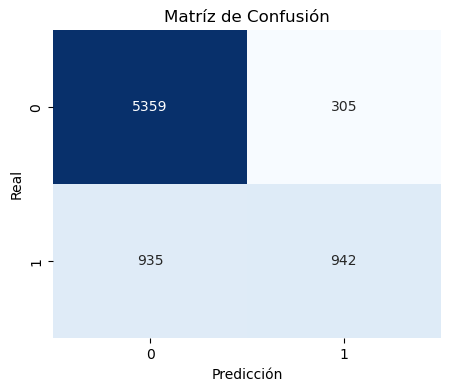

In [120]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matríz de Confusión")
plt.show()

In [121]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.12044478356796096
